# Lab 3: Computation of Rotating Unbalance

In [72]:
%load_ext autoreload
%autoreload 2
import vibration_toolbox as vtb
#from vibration_toolbox import sdof_cf
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import math as math
import scipy.linalg as la

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Geometry and Material Properties

In [73]:

n=40#no: of amplitudes to be considered in the experimental plots for analysis

## Plotting Experimental Data


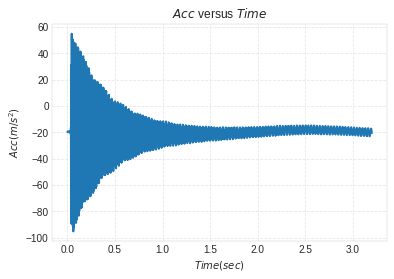

In [74]:
# Acc vs Time

%matplotlib inline
mat_contents=sio.loadmat('Case3-1.mat')
Time = mat_contents['Time_domain']
b = mat_contents['Time_chan_2']
# The acceleration values from Bobcat will be in Gs. So,  to convert them to m/s^2,
# we will have to multiply the vector by 9.81
Acc=b*9.81 
plt.plot(Time,Acc)
plt.grid('on')
plt.ylabel('$Acc(m/s^2)$')
plt.xlabel('$Time(sec)$')
plt.title('$Acc$ versus $Time$')
plt.show()

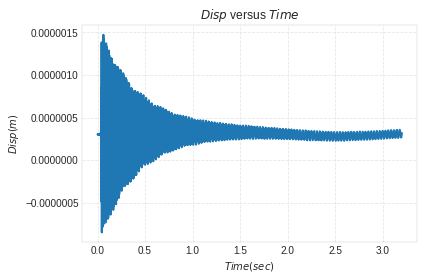

In [75]:
#  Disp vs Time

Td= (Time[n]-Time[0])/n
Wd=(2*math.pi)/Td
Disp=Acc/(-Wd**2)
plt.plot(Time,Disp)
plt.grid('on')
plt.ylabel('$Disp(m)$')
plt.xlabel('$Time(sec)$')
plt.title('$Disp$ versus $Time$')
plt.show()

    

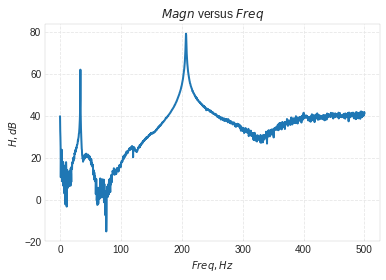

In [76]:
# Mag vs Freq

%matplotlib inline
mat_contents=sio.loadmat('Case3-1.mat')
c = mat_contents['Freq_domain']
d = mat_contents['Hf_chan_2']
H= (20)*(np.log10(np.abs(d)))
plt.plot(c,H)
plt.grid('on')
plt.xlabel('$Freq,Hz$')
plt.ylabel('$H,dB$')
plt.title('$Magn$ versus $Freq$')
plt.show()

## Experimental Data Analysis


### Using Vibration Toolbox

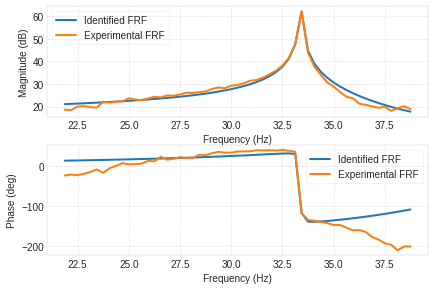

In [77]:
    %matplotlib inline
    mat_contents=sio.loadmat('Case3-1.mat')
    f = mat_contents['Freq_domain']
    TF = mat_contents['Hf_chan_2']
    Fmin=70
    Fmax=125
    if Fmin is None:
        inlow = 0
    else:
        inlow = Fmin
    
    if Fmax is None:
        inhigh = np.size(f)
    else:
        inhigh = Fmax
    
    if f[inlow] == 0:
        inlow = 1
    
    f = f[inlow:inhigh,:]
    TF = TF[inlow:inhigh,:]
    
    R = TF
    y = np.amax(np.abs(TF))
    cin = np.argmax(np.abs(TF))
    
    #works
    
    ll = np.size(f)
    
    w = f*2*np.pi*1j
    
    w2 = w*0
    R3 = R*0
    
    for i in range(1, ll+1):
        R3[i-1] = np.conj(R[ll-i])
        w2[i-1] = np.conj(w[ll-i])
#    for i in range(0, ll):
#        print(i)
#        R3[i] = np.conj(R[ll-i])
#        w2[i] = np.conj(w[ll-i])

    w = np.vstack((w2,w))
    R = np.vstack((R3,R))
    
    
    N = 2
    x, y = np.meshgrid(np.arange(0,N+1),R)
    x, w2d = np.meshgrid(np.arange(0,N+1),w)
    c = -1*w**N*R
#    c = np.ndarray.flatten(c)

#    print(w2d.shape)
#    input()
#    print(w2d[:,np.arange(0,N+1)].shape)
#    print(x[:,np.arange(0,N+1)].shape)
#    input()
    aa1 = w2d[:,np.arange(0,N)] \
              **x[:,np.arange(0,N)] \
              *y[:,np.arange(0,N)]
    aa2 = -w2d[:,np.arange(0,N+1)] \
              **x[:,np.arange(0,N+1)]
    aa = np.hstack((aa1,aa2))
    
    aa = np.reshape(aa,[-1,5])
#    c = np.mat(c).T
    
    #np.linalg.division()
#    scalef = np.abs(np.min(aa)-np.max(aa))
    b,_,_,_ = la.lstsq(aa,c)

    #temporary
#    b = np.array([[1.7914*10**6+4.5242*10**-1*1j],[-.1668+.0003*1j],[.0000+.0000*1j],[-1.0038*10**4-8.8731*10**-3*1j],[14.8662-.0000*1j]])
#    print(b.shape)
#    input() 
#    sel = np.arange(N-1,-1,-1)
#    print(sel)
#    print(np.vstack((1,b[sel])))
#    print(np.vstack(([1],b[np.arange(N-1,-1,-1)])))
#    print(np.ndim(np.ndarray.flatten(np.vstack(([1],b[np.arange(N-1,-1,-1)])))))
#    input()


#   Due to numpy adding an invisible extra dimension when vstacking I had to
#   flatten the array.
#   THE FOLLOWING LINE IS HORRIBLE HACKER CODE. KILL IT WITH FIRE.
    rs = np.roots(np.ndarray.flatten(np.vstack(([1],b[np.arange(N-1,-1,-1)]))))
#    print(rs)
#    input()

#    irs = np.argsort(np.abs(np.imag(rs)))
#    print(irs)
#    input()
    
#    rs = rs[irs]
#    print(rs)
#    input()
    omega = np.abs(rs[1])
    z = -1*np.real(rs[1])/np.abs(rs[1])
    nf = omega/2/np.pi

    XoF1 = np.hstack(([1/(w-rs[0]), 1/(w-rs[1])]))
    XoF2 = 1/(w**0)
    XoF3 = 1/w**2
#    print(XoF1)
#    print(XoF2)
#    print(XoF3)
#    input()
    XoF = np.hstack((XoF1, XoF2, XoF3))
    
    #check if extra _ needed

    a,_,_,_ = la.lstsq(XoF,R)
 #   a = np.array([[-7.8133*10**2+9.7895j*10**2],[-7.8023*10**2-9.7861j*10**2],[-1.7281-.0003j],[2.7703*10**2+3.2313j*10**-3]])
    XoF = XoF[np.arange(ll,2*ll),:].dot(a)
#    print(a)
#    print(ll)
#    print(XoF)
#    input()
    a = np.sqrt(-2*np.imag(a[0])*np.imag(rs[0])-2*np.real(a[0])*np.real(rs[0]))
    Fmin = np.min(f)
    Fmax = np.max(f)
    phase = np.unwrap(np.angle(TF),np.pi,0)*180/np.pi
    phase2 = np.unwrap(np.angle(XoF),np.pi,0)*180/np.pi
#    phase3 = np.angle(TF)*180/np.pi
    
#    print(TF)
#    print(np.angle(TF))
#    print(np.unwrap(np.angle(TF)))
#    print(phase2)
#    input()    
    while phase2[cin] > 50:
        phase2 = phase2 - 360
    phased = phase2[cin]-phase[cin]
    phase = phase+np.round(phased/360)*360
   
    #plot stuff
    fig = plt.figure()
    ax1 = fig.add_subplot(2,1,1)
    ax2 = fig.add_subplot(2,1,2)
    fig.tight_layout()
    
#    ax1.set_legend('Identified FRF','Experimental FRF')
    ax1.set_xlabel('Frequency (Hz)')
    ax1.set_ylabel('Magnitude (dB)')
    ax1.plot(f,20*np.log10(np.abs(XoF)), label="Identified FRF")
    ax1.plot(f,20*np.log10(np.abs(TF)), label="Experimental FRF")
    ax1.legend()
#    ax1.grid()

    ax2.set_xlabel('Frequency (Hz)')
    ax2.set_ylabel('Phase (deg)')
    ax2.plot(f,phase2, label="Identified FRF")
    ax2.plot(f,phase, label="Experimental FRF")
    ax2.legend()
#    ax2.plot(f,phase)
#    ax2.grid()
    
    _ = plt.show()
    
    a = a[0]**2/(2*np.pi*nf)**2

In [78]:
z

0.00066387491477745903

In [79]:
nf

33.392990681232554

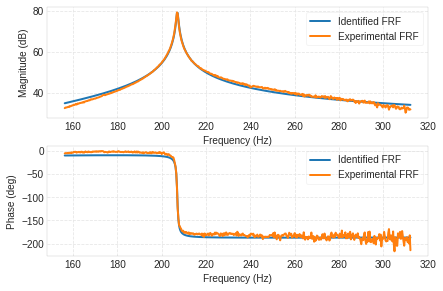

In [80]:
    %matplotlib inline
    mat_contents=sio.loadmat('Case3-1.mat')
    f = mat_contents['Freq_domain']
    TF = mat_contents['Hf_chan_2']
    Fmin=500
    Fmax=1000
    if Fmin is None:
        inlow = 0
    else:
        inlow = Fmin
    
    if Fmax is None:
        inhigh = np.size(f)
    else:
        inhigh = Fmax
    
    if f[inlow] == 0:
        inlow = 1
    
    f = f[inlow:inhigh,:]
    TF = TF[inlow:inhigh,:]
    
    R = TF
    y = np.amax(np.abs(TF))
    cin = np.argmax(np.abs(TF))
    
    #works
    
    ll = np.size(f)
    
    w = f*2*np.pi*1j
    
    w2 = w*0
    R3 = R*0
    
    for i in range(1, ll+1):
        R3[i-1] = np.conj(R[ll-i])
        w2[i-1] = np.conj(w[ll-i])
#    for i in range(0, ll):
#        print(i)
#        R3[i] = np.conj(R[ll-i])
#        w2[i] = np.conj(w[ll-i])

    w = np.vstack((w2,w))
    R = np.vstack((R3,R))
    
    
    N = 2
    x, y = np.meshgrid(np.arange(0,N+1),R)
    x, w2d = np.meshgrid(np.arange(0,N+1),w)
    c = -1*w**N*R

    aa1 = w2d[:,np.arange(0,N)] \
              **x[:,np.arange(0,N)] \
              *y[:,np.arange(0,N)]
    aa2 = -w2d[:,np.arange(0,N+1)] \
              **x[:,np.arange(0,N+1)]
    aa = np.hstack((aa1,aa2))
    
    aa = np.reshape(aa,[-1,5])
#    c = np.mat(c).T
    
    #np.linalg.division()
#    scalef = np.abs(np.min(aa)-np.max(aa))
    b,_,_,_ = la.lstsq(aa,c)

    #temporary
#    b = np.array([[1.7914*10**6+4.5242*10**-1*1j],[-.1668+.0003*1j],[.0000+.0000*1j],[-1.0038*10**4-8.8731*10**-3*1j],[14.8662-.0000*1j]])
#    print(b.shape)
#    input() 
#    sel = np.arange(N-1,-1,-1)
#    print(sel)
#    print(np.vstack((1,b[sel])))
#    print(np.vstack(([1],b[np.arange(N-1,-1,-1)])))
#    print(np.ndim(np.ndarray.flatten(np.vstack(([1],b[np.arange(N-1,-1,-1)])))))
#    input()


#   Due to numpy adding an invisible extra dimension when vstacking I had to
#   flatten the array.
#   THE FOLLOWING LINE IS HORRIBLE HACKER CODE. KILL IT WITH FIRE.
    rs = np.roots(np.ndarray.flatten(np.vstack(([1],b[np.arange(N-1,-1,-1)]))))
#    print(rs)
#    input()

#    irs = np.argsort(np.abs(np.imag(rs)))
#    print(irs)
#    input()
    
#    rs = rs[irs]
#    print(rs)
#    input()
    omega = np.abs(rs[1])
    z = -1*np.real(rs[1])/np.abs(rs[1])
    nf = omega/2/np.pi

    XoF1 = np.hstack(([1/(w-rs[0]), 1/(w-rs[1])]))
    XoF2 = 1/(w**0)
    XoF3 = 1/w**2
#    print(XoF1)
#    print(XoF2)
#    print(XoF3)
#    input()
    XoF = np.hstack((XoF1, XoF2, XoF3))
    
    #check if extra _ needed

    a,_,_,_ = la.lstsq(XoF,R)
 #   a = np.array([[-7.8133*10**2+9.7895j*10**2],[-7.8023*10**2-9.7861j*10**2],[-1.7281-.0003j],[2.7703*10**2+3.2313j*10**-3]])
    XoF = XoF[np.arange(ll,2*ll),:].dot(a)
#    print(a)
#    print(ll)
#    print(XoF)
#    input()
    a = np.sqrt(-2*np.imag(a[0])*np.imag(rs[0])-2*np.real(a[0])*np.real(rs[0]))
    Fmin = np.min(f)
    Fmax = np.max(f)
    phase = np.unwrap(np.angle(TF),np.pi,0)*180/np.pi
    phase2 = np.unwrap(np.angle(XoF),np.pi,0)*180/np.pi
#    phase3 = np.angle(TF)*180/np.pi
    
#    print(TF)
#    print(np.angle(TF))
#    print(np.unwrap(np.angle(TF)))
#    print(phase2)
#    input()    
    while phase2[cin] > 50:
        phase2 = phase2 - 360
    phased = phase2[cin]-phase[cin]
    phase = phase+np.round(phased/360)*360
   
    #plot stuff
    fig = plt.figure()
    ax1 = fig.add_subplot(2,1,1)
    ax2 = fig.add_subplot(2,1,2)
    fig.tight_layout()
    
#    ax1.set_legend('Identified FRF','Experimental FRF')
    ax1.set_xlabel('Frequency (Hz)')
    ax1.set_ylabel('Magnitude (dB)')
    ax1.plot(f,20*np.log10(np.abs(XoF)), label="Identified FRF")
    ax1.plot(f,20*np.log10(np.abs(TF)), label="Experimental FRF")
    ax1.legend()
#    ax1.grid()

    ax2.set_xlabel('Frequency (Hz)')
    ax2.set_ylabel('Phase (deg)')
    ax2.plot(f,phase2, label="Identified FRF")
    ax2.plot(f,phase, label="Experimental FRF")
    ax2.legend()
#    ax2.plot(f,phase)
#    ax2.grid()
    
    _ = plt.show()
    
    a = a[0]**2/(2*np.pi*nf)**2

In [81]:
z

0.0019686904369132321

In [82]:
nf=nf*2*math.pi
nf

1300.8226567928682

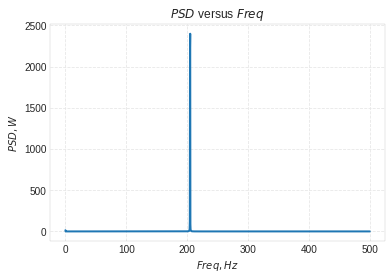

In [83]:
%matplotlib inline
mat_contents=sio.loadmat('Case3-2-Fn.mat')
c = mat_contents['Freq_domain']
d = mat_contents['PSD_chan_2']
plt.plot(c,d)
plt.grid('on')
plt.xlabel('$Freq,Hz$')
plt.ylabel('$PSD,W$')
plt.title('$PSD$ versus $Freq$')
plt.show()

In [106]:
psdmx=max(d)
fr=c[np.where(d==psdmx)]
wr=fr*2*math.pi
r=wr/nf
r

array([ 0.98867399], dtype=float32)

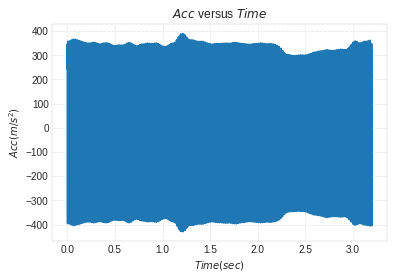

In [107]:
%matplotlib inline
mat_contents=sio.loadmat('Case3-2-Fn.mat')
Time = mat_contents['Time_domain']
b = mat_contents['Time_chan_2']
# The acceleration values from Bobcat will be in Gs. So,  to convert them to m/s^2,
# we will have to multiply the vector by 9.81
Acc=b*9.81 
plt.plot(Time,Acc)
plt.grid('on')
plt.ylabel('$Acc(m/s^2)$')
plt.xlabel('$Time(sec)$')
plt.title('$Acc$ versus $Time$')
plt.show()

In [108]:
Xmax_of_fn=max(Acc)/(wr)**(2)
Xmax_of_fn

array([ 0.00023501], dtype=float32)

In [100]:
%matplotlib inline
mat_contents=sio.loadmat('Case3-2-Fn.mat')
c = mat_contents['Freq_domain']
d = mat_contents['Hf_chan_2']
H= (20)*(np.log10(np.abs(d)))
H_of_fr=H[np.where(c==fr)]
H_of_fr

array([ 134.46676301])

In [115]:
m0e=Xmax_of_fn/H_of_fr
m0e

array([  1.74773337e-06])

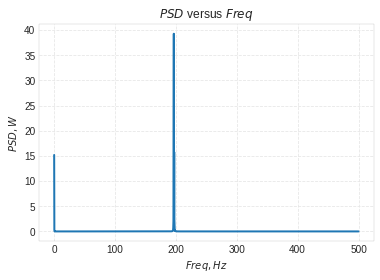

In [85]:
%matplotlib inline
mat_contents=sio.loadmat('Case3-3-Fn-10.mat')
c = mat_contents['Freq_domain']
d = mat_contents['PSD_chan_2']
plt.plot(c,d)
plt.grid('on')
plt.xlabel('$Freq,Hz$')
plt.ylabel('$PSD,W$')
plt.title('$PSD$ versus $Freq$')
plt.show()

In [86]:
psdmx=max(d)
frminusten=c[np.where(d==psdmx)]
wrminusten=frminusten*2*math.pi
rminus10=wrminusten/nf
rminus10

array([ 0.94942898], dtype=float32)

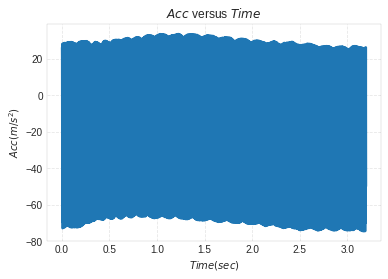

In [109]:
%matplotlib inline
mat_contents=sio.loadmat('Case3-3-Fn-10.mat')
Time = mat_contents['Time_domain']
b = mat_contents['Time_chan_2']
# The acceleration values from Bobcat will be in Gs. So,  to convert them to m/s^2,
# we will have to multiply the vector by 9.81
Acc=b*9.81 
plt.plot(Time,Acc)
plt.grid('on')
plt.ylabel('$Acc(m/s^2)$')
plt.xlabel('$Time(sec)$')
plt.title('$Acc$ versus $Time$')
plt.show()

In [111]:
Xmax_of_fnminus10=max(Acc)/(wrminusten)**(2)
Xmax_of_fnminus10

array([  2.20645070e-05], dtype=float32)

In [112]:
%matplotlib inline
mat_contents=sio.loadmat('Case3-3-Fn-10.mat')
c = mat_contents['Freq_domain']
d = mat_contents['Hf_chan_2']
H= (20)*(np.log10(np.abs(d)))
H_of_frminusten=H[np.where(c==frminusten)]
H_of_frminusten

array([ 122.27580516])

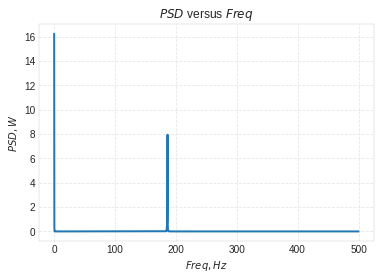

In [87]:
%matplotlib inline
mat_contents=sio.loadmat('Case3-4-Fn-20.mat')
c = mat_contents['Freq_domain']
d = mat_contents['PSD_chan_2']
plt.plot(c,d)
plt.grid('on')
plt.xlabel('$Freq,Hz$')
plt.ylabel('$PSD,W$')
plt.title('$PSD$ versus $Freq$')
plt.show()

In [88]:
psdmx=max(d)
frminus20=c[np.where(d==psdmx)]
wrminus20=frminus20*2*math.pi
rminus20=wrminus20/nf
rminus20

array([ 0.], dtype=float32)

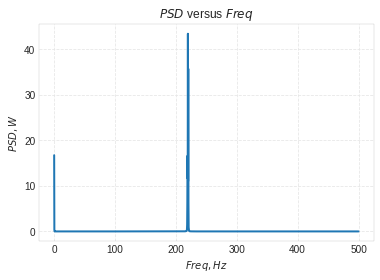

In [89]:
%matplotlib inline
mat_contents=sio.loadmat('Case3-5-Fn+10.mat')
c = mat_contents['Freq_domain']
d = mat_contents['PSD_chan_2']
plt.plot(c,d)
plt.grid('on')
plt.xlabel('$Freq,Hz$')
plt.ylabel('$PSD,W$')
plt.title('$PSD$ versus $Freq$')
plt.show()

In [90]:
psdmx=max(d)
frplus10=c[np.where(d==psdmx)]
wrplus10=frplus10*2*math.pi
rplus10=wrplus10/nf
rplus10

array([ 1.06112647], dtype=float32)

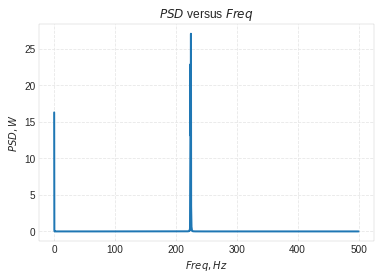

In [91]:
%matplotlib inline
mat_contents=sio.loadmat('Case3-6-Fn+20.mat')
c = mat_contents['Freq_domain']
d = mat_contents['PSD_chan_2']
plt.plot(c,d)
plt.grid('on')
plt.xlabel('$Freq,Hz$')
plt.ylabel('$PSD,W$')
plt.title('$PSD$ versus $Freq$')
plt.show()

In [93]:
psdmx=max(d)
frplus20=c[np.where(d==psdmx)]
wrplus20=frplus20*2*math.pi
rplus20=wrplus20/nf
rplus20

array([ 1.08527732], dtype=float32)

## Beam Parameters


In [16]:
E=7.31e10 #young's Modulus
b1=0.0254 #width
h=0.0127 #height
l=0.5524 #length
r=2.7*(10**3) #Density
A=b1*h #Cross-sectional area
v=l*b1*h #volume
m=r*v #mass
I=(1/12)*b1*(h**3) #Area moment of inertia

## Close form Euler-Bernoulli solution


In [89]:
betal= 1.87510407
beta1=betal/l 
wnA1=((beta1)**2/(2*math.pi))*(((E*I)/(r*A)))**(1/2)
wnA1

34.98270993916083

In [92]:
betal= 4.69409113
beta2=betal/l 
wnA2=((beta2)**2/(2*math.pi))*(((E*I)/(r*A)))**(1/2)
wnA2

219.23290036128418

## Transverse Displacement at beam center using VTB


array([ 3761.41692009])

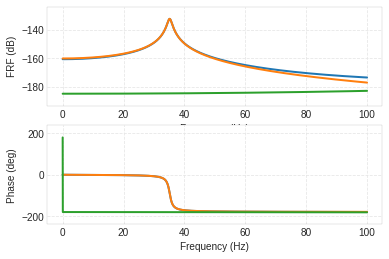

In [111]:
vtb.euler_beam_frf(xin=l, xout=l/2, fmin=0.0, fmax=100.0, zeta=0.02,
                   bctype=2, npoints=1601,
                   beamparams=np.array([E, I,
r, A, l]))
admittanceCen = np.abs(H[1600])
excitationforce=100
displacementCen = admittanceCen*excitationforce
displacementCen

## Transverse Displacement at beam tip using VTB


array([ 3761.41692009])

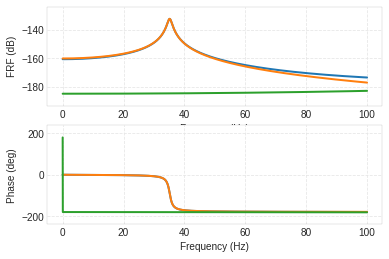

In [110]:
vtb.euler_beam_frf(xin=l/2, xout=l, fmin=0.0, fmax=100.0, zeta=0.02,
                   bctype=2, npoints=1600,
                   beamparams=np.array([E, I,
r, A, l]))

admittanceEnd = np.abs(H[1600])
excitationforce=100
displacementEnd = admittanceEnd*excitationforce
displacementEnd
#admittanceEnd